# **Performance Metrics for Classification** 

# **Problem Statement**
#### The objective of this report is to evaluate a model for MNIST classification. 

## **Importing Libraries**

In [277]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# plotting modules
from matplotlib import pyplot as plt
import matplotlib.patches as patches  # for curved arrows
import seaborn as sns

# The web source of the MNIST dataset that we will work with
from sklearn.datasets import fetch_openml

# The classifiers we will use in this notebook
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# cross validation functions
from sklearn.model_selection import cross_validate, cross_val_predict

# performance metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score,  classification_report, accuracy_score


## **Getting Data**

Load the data from [openml.org](https://openml.org/) using the function `sklearn.datasets.fetch_openml`

In [278]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

## **Exploring the Data**

In [279]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

Dataset Description:
Number of Instances: 70,000
Number of Features: 784 (28x28 pixels)
Target Classes: 10 (digits 0-9)

In [280]:
# Type of the mnist dataset
type(mnist)

sklearn.utils._bunch.Bunch

In [281]:
# Keys in mnist dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [282]:
# Shape of the mnist data array
mnist.data.shape

(70000, 784)

In [283]:
mnist.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [284]:
# Array representing the pixel values of the first image
mnist.data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [285]:
# Shape of the target array: (70000,) indicating the labels for each image
mnist.target.shape

(70000,)

In [286]:
# Check for null values
data = pd.DataFrame(mnist.data)
is_null = data.isnull().sum()
print(is_null)

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64


In [287]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


### **Visualize first 25 images to understand the structure and content of the dataset.**

Kaggle : [Reference](https://www.kaggle.com/code/kanikaw/mnist-nn-from-scratch?scriptVersionId=164122350&cellId=8)

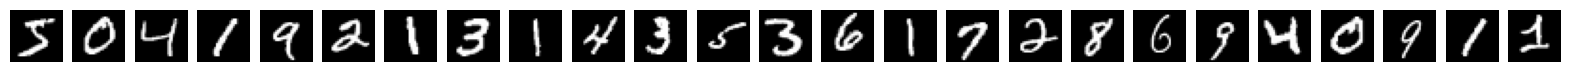

In [288]:
plt.figure(figsize=(20, 20))
for i in range(25):
    plt.subplot(1, 25, i + 1)
    plt.imshow(mnist.data[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

- From the visualization we can see that the same digits are hand written in different ways. 
- Some of the digits are not perfectly formed and have varying thickness and curvature. 

### **Visualize first 10 samples from each class**

Kaggle : [Reference](https://www.kaggle.com/code/fold10/exploring-mnist?scriptVersionId=129644281&cellId=4)

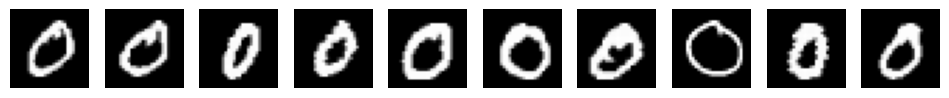

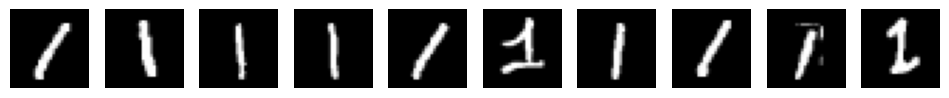

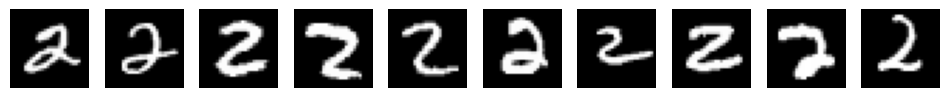

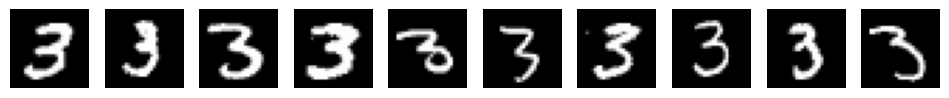

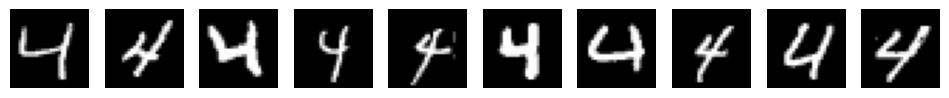

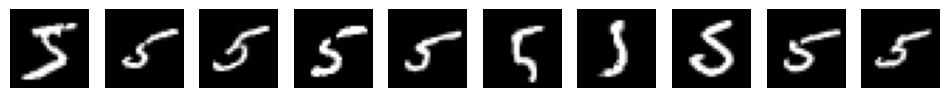

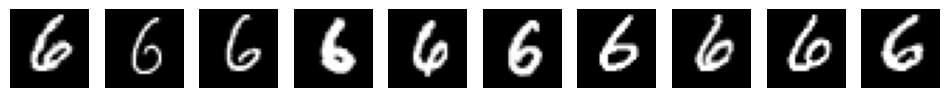

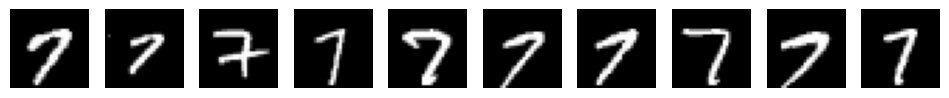

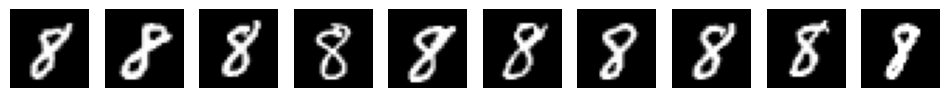

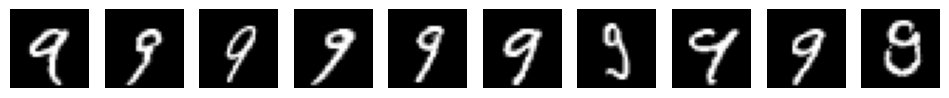

In [289]:
classes = np.unique(mnist.target)

# For each class
for cls in classes:
    # Initialize plot
    fig, axes = plt.subplots(1, 10, figsize=(12, 4))
    
    # Get first 10 samples of this class
    samples = mnist.data[mnist.target == cls][:10]
    
    # For each sample
    for i, sample in enumerate(samples):
        # Plot sample
        img = sample.reshape(28, 28)
        axes[i].imshow(img, cmap='gray')
        axes[i].axis("off")
    # Show plot
    plt.show()

### **Check class distribution**

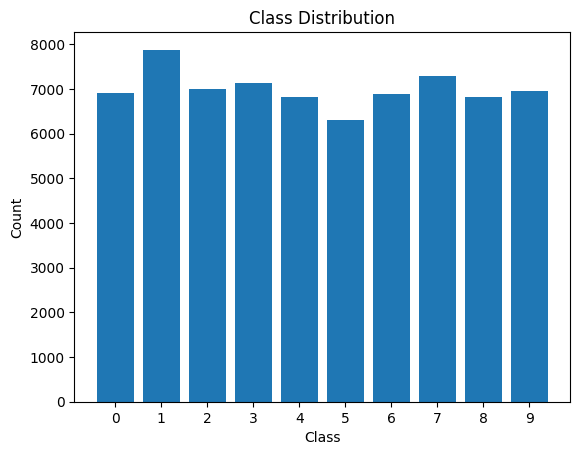

In [290]:
# Check for class imbalance in the mnist dataset
class_counts = np.bincount(mnist.target.astype(int))
plt.bar(np.arange(10), class_counts, tick_label=np.arange(10))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

- The digit ‘1’ appears to have the highest count, indicating that it has the most instances in the dataset.
- The digit ‘5’ appears to have the lowest count, indicating that it has the fewest instances in the dataset.
- The distribution of classes is relatively balanced, with no extreme imbalance observed.

### **Explore pixel intensity distributions for a sample image**

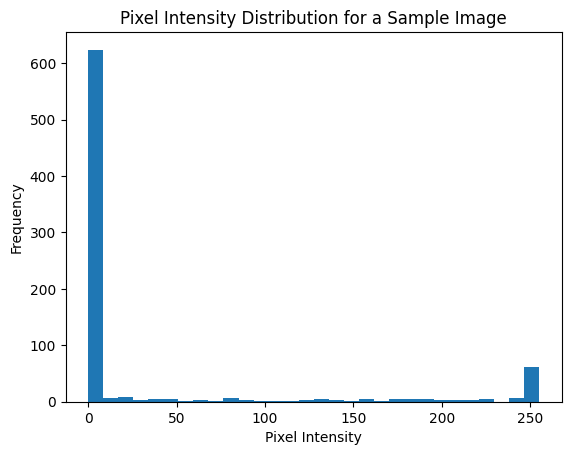

In [291]:
plt.hist(mnist.data[0], bins=30)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution for a Sample Image')
plt.show()

- The majority of the pixels in the image have an intensity of 0, indicating that they are black

## **Choosing Number of Classes**

In [292]:
# select 3 classes from the MNIST dataset
selected_classes = ['0', '1', '2','3','4']
selected_indices = np.isin(mnist.target, selected_classes)
X_selected = mnist.data[selected_indices]
y_selected = mnist.target[selected_indices]

In [293]:
# check target object and the data object are still aligned 
X_selected.shape, y_selected.shape

((35735, 784), (35735,))

## **Split the dataset to train-validation-test**

In [294]:
train_ratio = .70
test_ratio = .15
validation_ratio = .15

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=test_ratio, random_state=42) 
X_train, X_val , y_train, y_val = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio), random_state=42)


In [295]:
X_train.shape, X_test.shape, X_val.shape

((25013, 784), (5361, 784), (5361, 784))

## **SGDClassifier**

In [296]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [297]:
y_val_pred = sgd_clf.predict(X_val)

## **Model Evaluation**

In [298]:
def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy of Validation Data: "+ str(accuracy))
    
    return accuracy

### Classification Report ( accuracy, precision, recall and F1 for each class)

In [299]:
acc_sgd  = print_validation_report(y_val, y_val_pred)

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1018
           1       0.99      0.97      0.98      1197
           2       0.94      0.91      0.92      1023
           3       0.95      0.94      0.94      1093
           4       0.97      0.97      0.97      1030

    accuracy                           0.96      5361
   macro avg       0.96      0.96      0.96      5361
weighted avg       0.96      0.96      0.96      5361

Accuracy of Validation Data: 0.95747062115277


### Confusion metric

In [300]:
cm = confusion_matrix(y_val, y_val_pred)
cm

array([[1010,    0,    3,    3,    2],
       [   1, 1164,   16,   12,    4],
       [  38,    6,  928,   33,   18],
       [  21,    7,   34, 1027,    4],
       [  10,    2,    7,    7, 1004]], dtype=int64)

In [301]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

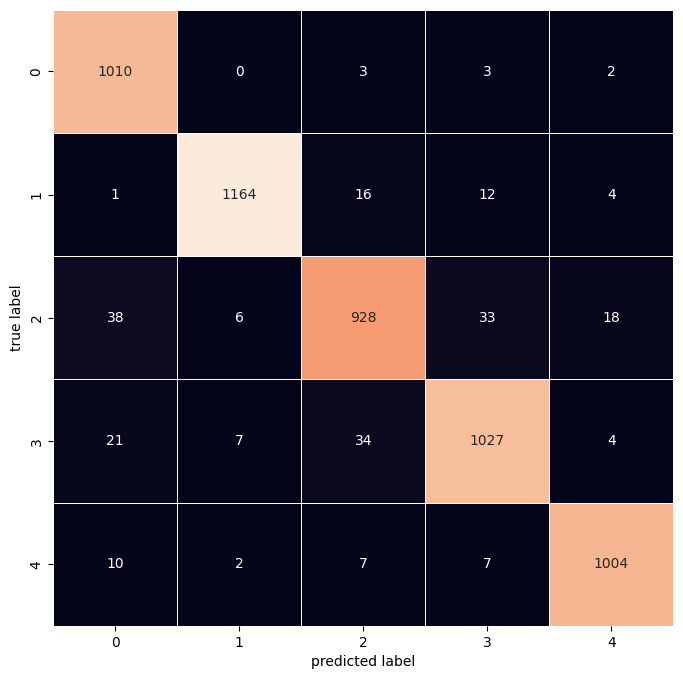

In [302]:
plot_confusion_matrix(y_val, y_val_pred)

### Precision-Recall Curve 

In [303]:
y_val_scores = cross_val_predict(sgd_clf, X_val, y_val, cv=3, method="decision_function")


In [304]:

chosen_class = '0'
unique_classes = np.unique(y_val)
chosen_class_index = np.where(unique_classes == chosen_class)[0][0]
y_val_binary = (y_val == chosen_class).astype(int)
precisions, recalls, thresholds = precision_recall_curve(y_val_binary, y_val_scores[:, int(chosen_class)])

In [305]:
print(precisions.shape)
print(recalls.shape)
print(thresholds.shape)

(5362,)
(5362,)
(5361,)


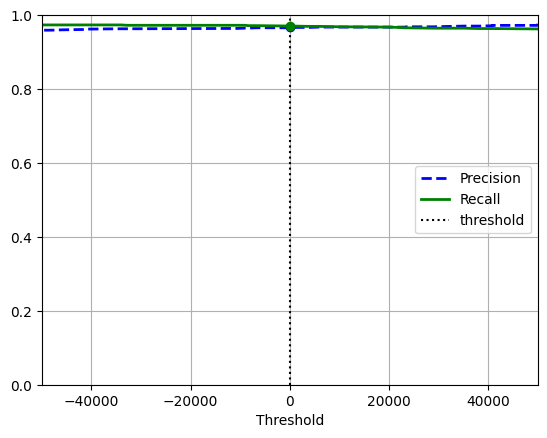

In [306]:
threshold = 0
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()

### Insights

The overall accuracy of the model on the validation data is approximately 95.75%. 
The model has a high precision (0.94) and recall (0.99) for class 0, indicating that it is very good at predicting and identifying this class. The F1-score is also high for all classes which indicate a good balance. 

## **Increase precision and recall for chosen class**

In [307]:
threshold_precision = 0.8  # Adjust threshold to increase precision

# Convert probabilities to predicted class labels based on the new threshold
y_val_pred_class = ( y_val_scores[:, int(chosen_class)] > threshold_precision).astype(int)

# Calculate precision after adjusting the threshold
precision_after_adjustment = precision_score(y_val_binary, y_val_pred_class)
print("Precision after adjustment:", precision_after_adjustment)

Precision after adjustment: 0.9667318982387475


In [308]:
threshold_recall = 0.1  # Adjust threshold to increase recall

# Convert probabilities to predicted class labels based on the new threshold
y_val_pred_class = (y_val_scores[:, chosen_class_index] > threshold_recall).astype(int)

# Calculate recall after adjusting the threshold
recall_after_adjustment = recall_score(y_val_binary, y_val_pred_class)
print("Recall after adjustment:", recall_after_adjustment)

Recall after adjustment: 0.9705304518664047


## **Accuracy of Model on Test Set**

In [309]:
y_test_pred = sgd_clf.predict(X_test)

In [310]:
acc_sgd  = print_validation_report(y_test, y_test_pred)

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1043
           1       0.99      0.97      0.98      1167
           2       0.94      0.91      0.92      1065
           3       0.94      0.95      0.95      1083
           4       0.98      0.97      0.97      1003

    accuracy                           0.96      5361
   macro avg       0.96      0.96      0.96      5361
weighted avg       0.96      0.96      0.96      5361

Accuracy of Validation Data: 0.9595224771497854


### Conclusions
Overall the model performs well on the test data with high accuracy, precision, recall, and F1-score.

Accuracy: The overall accuracy of the model on the test data is approximately 95.95%.

The model has a high precision (0.96) and recall (0.99) for class 0 and class 1

The F1-score is also high for all classes which indicate a good balance between precision and recall